# Linear Regression¶

Amazon_cloths sells cloths online. Customers come in to the store, have meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. Following is predict is analysis for this company

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Ecommerce Customers')
print('df = Ecommerce Customers dataframe')

df = Ecommerce Customers dataframe


In [5]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Checking the the number of rows; no. & types of variables (continuous, categorical etc.)

In [7]:
df.shape

(500, 8)

In [11]:
print('The number of columns are :',df.shape[1])
print('The number of rows are :',df.shape[0])

The number of columns are : 8
The number of rows are : 500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [17]:
num_col=df.select_dtypes(np.number)
print('number of numerical columns are :',num_col.columns)
cat_col=df.select_dtypes('object')
print('number of categorical columns are :',cat_col.columns)

number of numerical columns are : Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')
number of categorical columns are : Index(['Email', 'Address', 'Avatar'], dtype='object')


### Five point summary for numerical variables

In [18]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Summarize observations for categorical variables – no. of categories, % observations in each category

In [21]:
for i in cat_col.columns:
    print(i,'columns:')
    print('% observation in',i)
    print(df[i].value_counts(normalize=True),'\n')

Email columns:
% observation in Email
hevans@kelly-nunez.org              0.002
james30@carter.biz                  0.002
pvega@hotmail.com                   0.002
nielsencarmen@harrell.net           0.002
davischristina@hotmail.com          0.002
                                    ...  
michelleshepherd@price.com          0.002
michaelferguson@torres-miles.net    0.002
zmalone@yahoo.com                   0.002
egomez@hotmail.com                  0.002
andreperez@hotmail.com              0.002
Name: Email, Length: 500, dtype: float64 

Address columns:
% observation in Address
USNS Cardenas\nFPO AA 85439-9449                            0.002
836 Amy Villages\nHannahside, RI 09207-2616                 0.002
Unit 4065 Box 2267\nDPO AE 69180-7372                       0.002
691 Johnson Field Apt. 510\nMichaelville, VI 78140          0.002
9271 Christopher Prairie\nDouglasshire, NM 18581            0.002
                                                            ...  
486 Adams Hills\nNo

### Checking variables have missing/null values

In [22]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Inference : We can observe that there are no Null Values present and hence no Treatment required

### checking variables have outliers

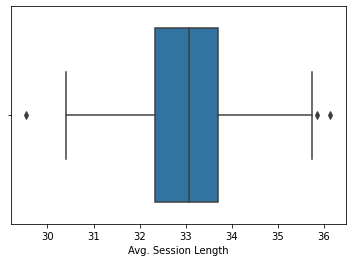

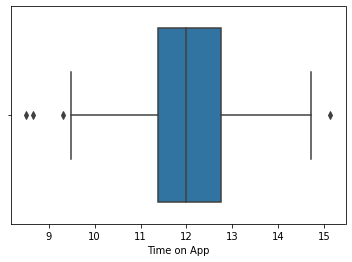

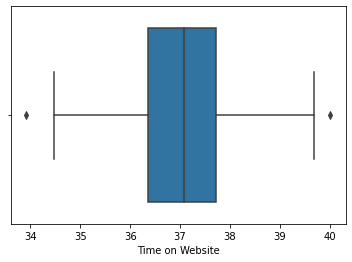

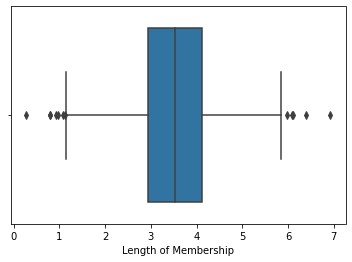

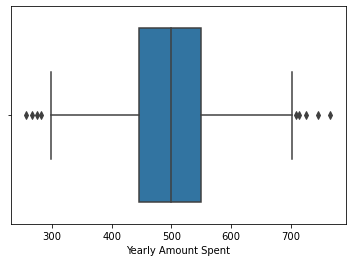

In [40]:
for i in num_col:
    sns.boxplot(df[i])
    plt.show()

Inference : There are outliers present in all the features but they are not very significant. Also, since the data points is less in the dataset, we would lose some data if we treat them. Hence we do not treat the outliers.

### Checking the data normally distributed

Distribution of Avg. Session Length
skewness -0.03217480705175736


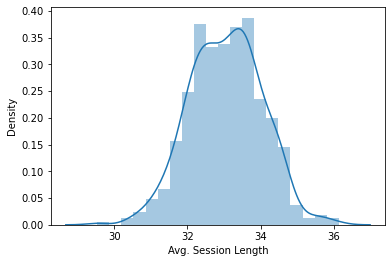

Distribution of Time on App
skewness -0.0891210975109327


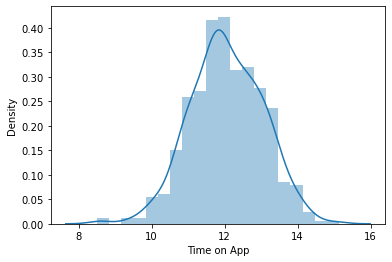

Distribution of Time on Website
skewness 0.012141880271484537


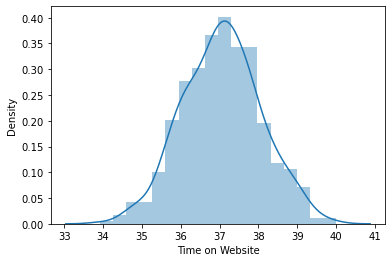

Distribution of Length of Membership
skewness -0.10660805308863916


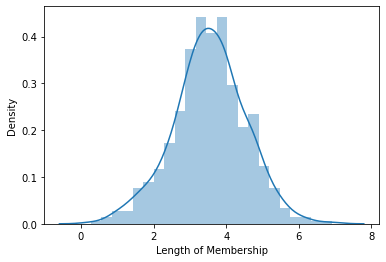

Distribution of Yearly Amount Spent
skewness 0.034790184115234546


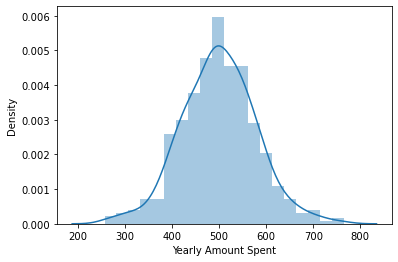

In [42]:
for i in num_col:
    print('Distribution of',i)
    print('skewness',df[i].skew())
    sns.distplot(df[i])
    plt.show()

## Data Analysis

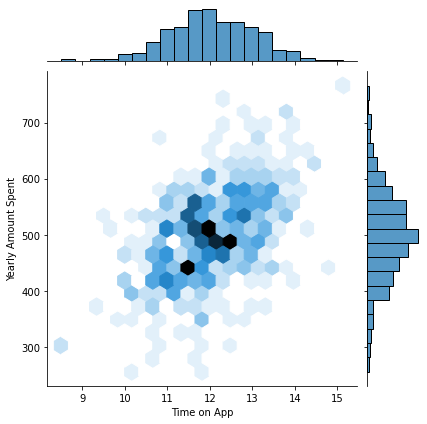

In [47]:
sns.jointplot(df['Time on App'],df['Yearly Amount Spent'],kind='hex')
plt.show()

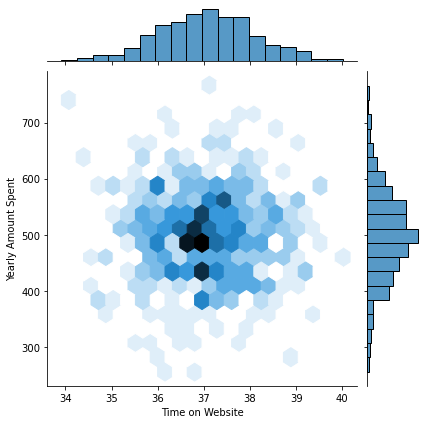

In [48]:
sns.jointplot(df['Time on Website'],df['Yearly Amount Spent'],kind='hex')
plt.show()

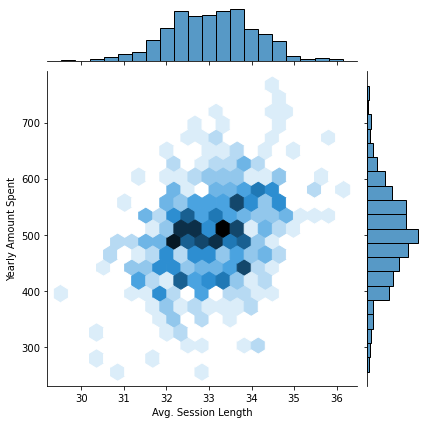

In [49]:
sns.jointplot(df['Avg. Session Length'],df['Yearly Amount Spent'],kind='hex')
plt.show()

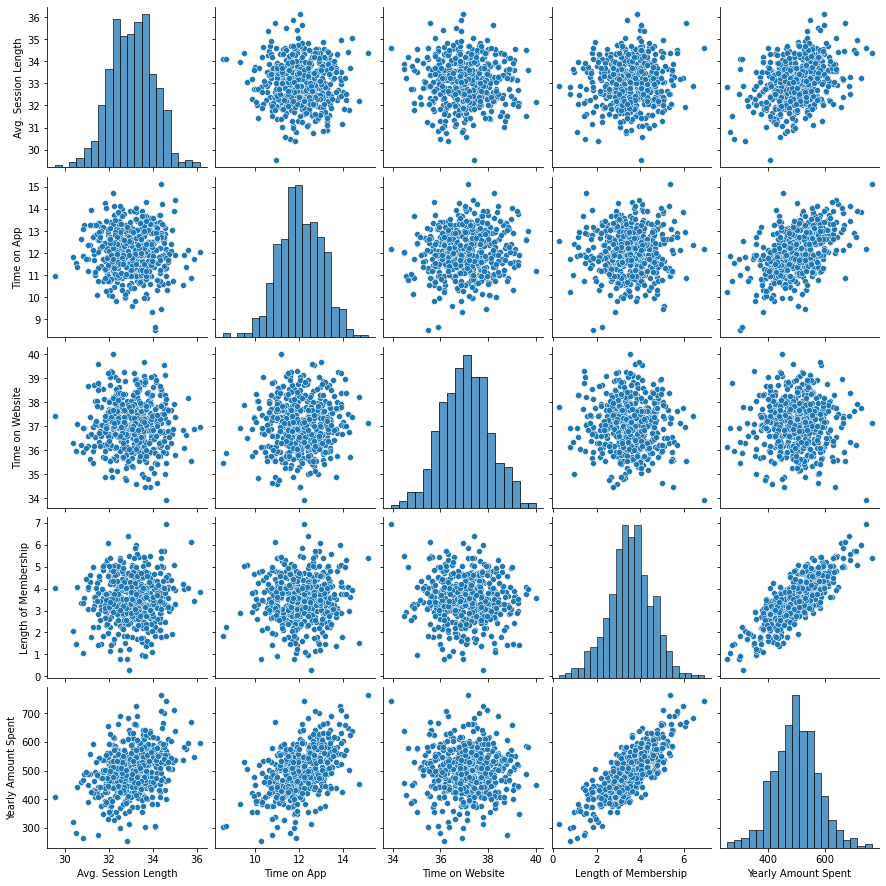

In [53]:
sns.pairplot(df)
plt.show()

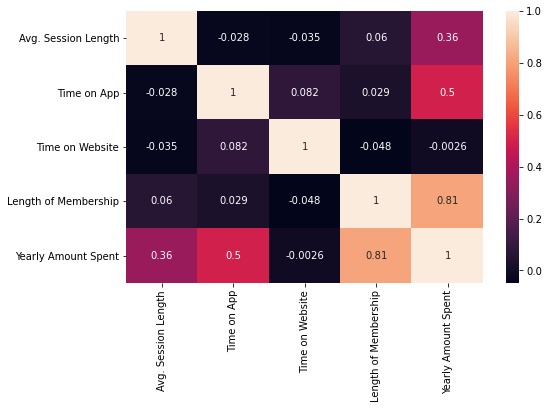

In [61]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

Inference : 
    
1. The 'Length of Membership' is highly correlated with the 'Yearly Amount Spent'. Also, 'Time on App' and 'Avg. Session          Length' show good correlation with the Target variables.

2. None of the independent variables are correlated among themselves.

3. 'Time on Website' has a very low negative correlation of -0.0026

## Create a linear model plot (using seaborn's lmplot) of Yearly Amount Spent vs. Length of Membership

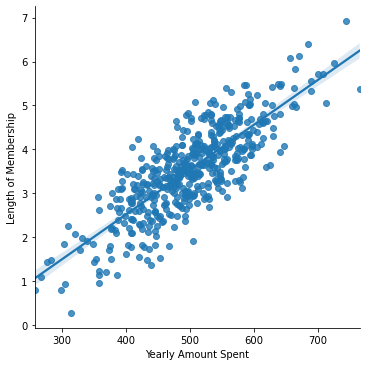

In [65]:
sns.lmplot(x='Yearly Amount Spent',y ='Length of Membership', data=df)
plt.show()

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets. ** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [91]:
y = df['Yearly Amount Spent']
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=42

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

## Training the Model

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lr=LinearRegression()

In [104]:
lr.fit(X_train,y_train)

LinearRegression()

### Print out the coefficients of the model

In [105]:
print('Coefficients: \n',lr.coef_)

Coefficients: 
 [ 2.57675297e+01  3.88003936e+01 -1.80409231e-02  6.18525679e+01]


## Predicting Test Data

In [106]:
predictions=lr.predict(X_test)

### Create a scatterplot of the real test values versus the predicted values

Text(0, 0.5, 'Predicted y')

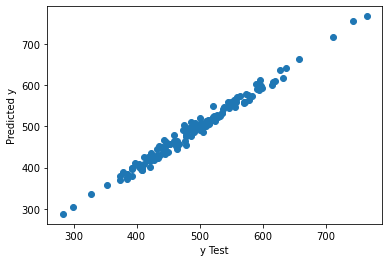

In [107]:
plt.scatter(y_test,predictions)
plt.xlabel('y Test')
plt.ylabel('Predicted y')

## Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

*Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. *

In [108]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [109]:
print('MAE',mean_absolute_error(y_test,predictions))
print('MSE',mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(mean_squared_error(y_test,predictions)))

MAE 7.8513771708614435
MSE 94.55779479273288
RMSE 9.724083236620967


## Residuals
Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist()

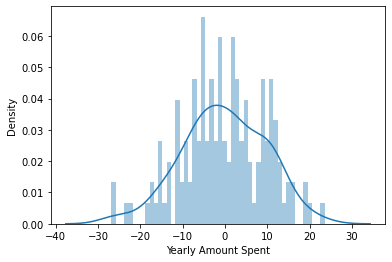

In [115]:
sns.distplot((y_test-predictions),bins=50)
plt.show()

# Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important. Let's see if we can interpret the coefficients at all to get an idea.

In [116]:
coeffecients=pd.DataFrame(lr.coef_,X.columns)
coeffecients.columns=['coeffecients']
coeffecients

,coeffecients
Avg. Session Length,25.767530
Time on App,38.800394
Time on Website,-0.018041
Length of Membership,61.852568


Here we can see that the Time on app coffecients is hihger than the other so the company should focus more on their mobile app 

### Time on App (Mobile App)